# NETWORK VISUALIZATION

This notebook produces different visualizations of a weighted directed graph.
The file "raan_case_study.xlsx" must be in the same directory.

## Imports

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [3]:
df_edges = pd.read_excel("raan_case_study.xlsx", sheet_name = 0)
df_edges.head(2)

,source_id,target_id,weights
0,966,945,13
1,966,879,10


In [4]:
df_nodes = pd.read_excel("raan_case_study.xlsx", sheet_name = 1)
df_nodes.head(2)

,node_id,node_color,node_label,Unnamed: 3
0,3,#0066CC,James,NaN
1,158,#0066CC,John,NaN


## Create the graph

In [5]:
G = nx.DiGraph()

In [6]:
# add nodes
nodes_list = [(el[0], {'color': el[1], 'label':el[2]}) for _, el in df_nodes.T.items()]
G.add_nodes_from(nodes_list)
G.nodes(data=True)

NodeDataView({3: {'color': '#0066CC', 'label': 'James'}, 158: {'color': '#0066CC', 'label': 'John'}, 172: {'color': '#0066CC', 'label': 'Robert'}, 185: {'color': '#0066CC', 'label': 'Michael'}, 349: {'color': '#0066CC', 'label': 'William'}, 457: {'color': '#A05EB5', 'label': 'David'}, 467: {'color': '#A05EB5', 'label': 'Richard'}, 498: {'color': '#A05EB5', 'label': 'Joseph'}, 517: {'color': '#A05EB5', 'label': 'Thomas'}, 552: {'color': '#A05EB5', 'label': 'Charles'}, 574: {'color': '#00965E', 'label': 'Mary'}, 619: {'color': '#00965E', 'label': 'Patricia'}, 639: {'color': '#00965E', 'label': 'Jennifer'}, 649: {'color': '#00965E', 'label': 'Linda'}, 652: {'color': '#00965E', 'label': 'Elizabeth'}, 709: {'color': '#E40046', 'label': 'Barbara'}, 747: {'color': '#E40046', 'label': 'Susan'}, 785: {'color': '#E40046', 'label': 'Jessica'}, 792: {'color': '#E40046', 'label': 'Sarah'}, 813: {'color': '#E40046', 'label': 'Karen'}, 879: {'color': '#ED8B00', 'label': 'Christopher'}, 941: {'color':

In [7]:
# add edges
edges_list = [(el[0], el[1], el[2]) for _, el in df_edges.T.items()]
G.add_weighted_edges_from(edges_list)
G.edges(data=True)

OutEdgeDataView([(185, 966, {'weight': 6}), (349, 966, {'weight': 6}), (457, 966, {'weight': 7}), (552, 966, {'weight': 6}), (574, 966, {'weight': 6}), (639, 966, {'weight': 6}), (649, 966, {'weight': 9}), (709, 966, {'weight': 5}), (747, 966, {'weight': 6}), (792, 966, {'weight': 5}), (792, 652, {'weight': 5}), (813, 966, {'weight': 5}), (879, 966, {'weight': 5}), (941, 966, {'weight': 8}), (966, 945, {'weight': 13}), (966, 879, {'weight': 10}), (966, 467, {'weight': 8}), (966, 1042, {'weight': 7}), (966, 785, {'weight': 7}), (966, 619, {'weight': 7}), (966, 639, {'weight': 6}), (966, 1152, {'weight': 6}), (966, 517, {'weight': 6}), (966, 158, {'weight': 6}), (966, 498, {'weight': 6}), (966, 1157, {'weight': 5}), (966, 185, {'weight': 5}), (966, 1025, {'weight': 5}), (966, 172, {'weight': 5}), (966, 3, {'weight': 5}), (1009, 966, {'weight': 5}), (1157, 966, {'weight': 6})])

## Visualization

### Create Json used on observablehq.com
if not interested skip the following cells and jump directly to Create Plots

In [8]:
nodes_list = [{'id': str(el[0]), 'label': el[1]['label'], 'color': el[1]['color']} for el in G.nodes(data=True)]

In [9]:
edge_list = [{'source': str(el[0]), 'target': str(el[1]), 'value': el[2]['weight'] , 'type': 'standard'} for el in G.edges(data=True)]

In [10]:
data = {'nodes': nodes_list, 'links': edge_list}

In [11]:
# create txt file used on observable.com
from numpyencoder import NumpyEncoder
with open('graph.txt', 'w') as outfile:
    json.dump(data, outfile, indent=4, sort_keys=True,
              separators=(', ', ': '), ensure_ascii=False,
              cls=NumpyEncoder)

## Create Plots

In [12]:
#%matplotlib qt 
# uncomment the previous line and comment the follwing one to have the plot being opened on a separate window instead of being printed in the notebook
%matplotlib inline

### 2D visualization

In [13]:
# create positions of nodes in 2d plane (k defines the optimal distance between nodes)
pos = nx.layout.spring_layout(G, dim =2, k = 1, weight='weight')
Xn=[pos[el][0] for el in pos] # x-coordinates of nodes
Yn=[pos[el][1] for el in pos] # y-coordinates

In [14]:
# create lists with nodes attibutes 
names_list = [el[1]['label'] for el in G.nodes(data=True)] # labels
attr_list = [(el[0], el[1]['label']) for el in G.nodes(data=True)] # id and labels
id_list = [el[0] for el in G.nodes(data=True)] # id
color_list = [el[1]['color'] for el in G.nodes(data=True)] # colors

In [15]:
# create function for 2d plot
def network_plot_2D(G):
    
    # Define color range proportional to number of edges adjacent to a single node
    colors_dict = {el[0]:el[1]['color'] for el in list(G.nodes(data=True))}
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig, ax= plt.subplots()
        fig.set_figheight(10)
        fig.set_figwidth(17)
              
        # Loop on the pos dictionary to extract the x,y coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
           
            
            # Scatter plot
            ax.scatter(xi, yi, c=G.nodes(data=True)[key]['color'], s=200,
                       edgecolors='k', alpha=0.7, label=(key,G.nodes(data=True)[key]['label']))
            
            ax.text(xi, yi,  '%s' % (str(key)), size=20, zorder=1, color='k', 
                    fontsize = 12, alpha = 1, fontweight='black', in_layout=True)  
            
        # create vectores with starting point and direction of the edges
        Xe = np.array([pos[el[0]][0] for el in G.edges()])
        Ye = np.array([pos[el[0]][1] for el in G.edges()])
       
        Ue = np.array([pos[el[1]][0] for el in G.edges()]) - Xe
        Ve = np.array([pos[el[1]][1] for el in G.edges()]) - Ye
        
        # create weight list (the edge width will be proportional to the edge weight)
        weights_list = np.array([el[2]['weight']/800 for el in G.edges(data=True)])
        
        # loop over edges
        for i, edge in enumerate(G.edges()):
            ax.arrow(Xe[i], Ye[i], Ue[i], Ve[i], width = weights_list[i], alpha=0.5, length_includes_head=True)  
    
        ax.legend(loc = 'upper right')
    
    return

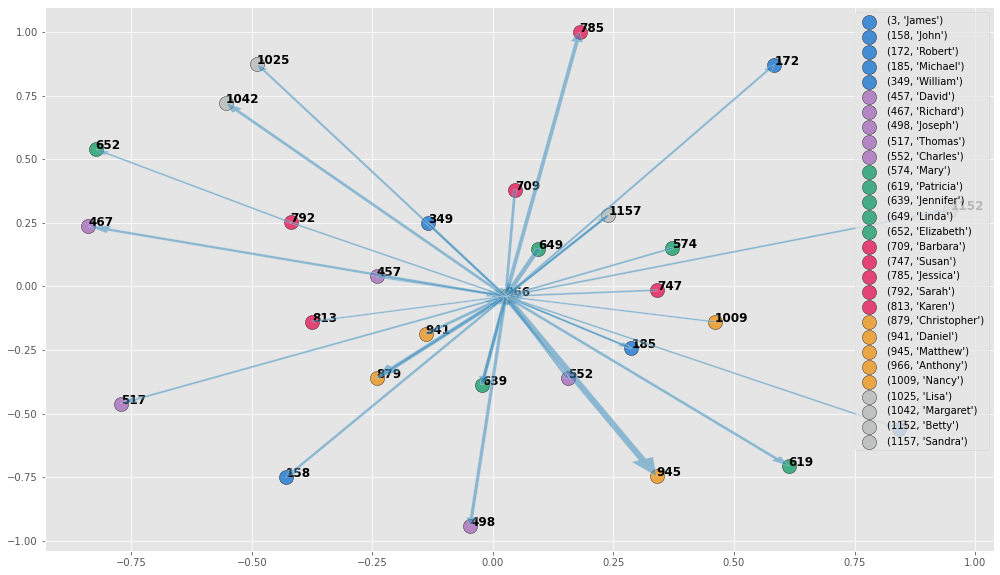

In [16]:
network_plot_2D(G) 
# when opened on a separate windon(%matplotlib qt) click on the lens on the top left and left select the area to zoom in (to zoom out right select)

### 3D visualization

#### matplotlib

In [17]:
# create position of nodes in the 3d space
pos = nx.layout.spring_layout(G, dim =3, weight='weight')
Xn=[pos[el][0] for el in pos] # x-coordinates of nodes
Yn=[pos[el][1] for el in pos] # y-coordinates
Zn=[pos[el][2] for el in pos] # z-coordinates

In [19]:
def network_plot_3D(G, angle):
 
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(14,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=G.nodes(data=True)[key]['color'], s=200,
                       edgecolors='k', alpha=0.7, label=(key,G.nodes(data=True)[key]['label']))
            
            ax.text(xi, yi, zi,  '%s' % (str(key)), size=20, zorder=1, color='k', 
                    fontsize = 12, alpha = 1, fontweight='black', in_layout=True)  
            
        # create vectors with staring point and direction of edges        
        Xe = np.array([pos[el[0]][0] for el in G.edges()])
        Ye = np.array([pos[el[0]][1] for el in G.edges()])
        Ze = np.array([pos[el[0]][2] for el in G.edges()])
        Ue = np.array([pos[el[1]][0] for el in G.edges()]) - Xe
        Ve = np.array([pos[el[1]][1] for el in G.edges()]) - Ye
        We = np.array([pos[el[1]][2] for el in G.edges()]) - Ze
        
        # create weight list (the edge width will be proportional to the edge weight)
        weights_list = [el[2]['weight']/2 for el in G.edges(data=True)]
        
        # add edges 
        ax.quiver(Xe, Ye, Ze, Ue, Ve, We,  arrow_length_ratio = 0.1, lw = weights_list, alpha=0.5)  
        
        # Set the initial view
        ax.view_init(30, angle)
        
        # add legend
        ax.legend()
    
        #plt.show()
    
    return

In [ ]:
%matplotlib qt 
# comment the previous line and uncomment the follwing one to have the plot being printed in the notebook instead of being opened on a separate window
#%matplotlib inline

In [27]:
network_plot_3D(G, 0)
# when opening the plot on a separate window click on the lens(on top-left) and press the right button of the mouse and slide it to zoom in and out 

#### plotly

In [21]:
# cones are used to indicate the direction of the head since plotly does not allow for arrow heads
# position of the cones
Xs = [0.55 * pos[el[1]][0] + 0.45 *  pos[el[0]][0] for el in G.edges()] 
Ys = [0.55 * pos[el[1]][1] + 0.45 *  pos[el[0]][1] for el in G.edges()] 
Zs = [0.55 * pos[el[1]][2] + 0.45 *  pos[el[0]][2] for el in G.edges()]
# direction of the cones
Us = [pos[el[1]][0] - pos[el[0]][0] for el in G.edges()] 
Vs = [pos[el[1]][1] - pos[el[0]][1] for el in G.edges()] 
Ws = [pos[el[1]][2] - pos[el[0]][2] for el in G.edges()] 

In [23]:
# create trace for nodes (each nodes displays its id and hovering over the node the node label appers)
trace1=go.Scatter3d(x=Xn, y=Yn, z=Zn,mode='text+markers', name='nodes', text = id_list,
               marker=dict(symbol='circle',size=10, color= color_list, 
                           line=dict(color='rgb(50,50,50)', width=0.5)),
                    textposition="bottom center", meta= attr_list, hoverinfo ='text', hovertext = names_list)

# set axis for plot
axis=dict(showbackground=False, showline=False, zeroline=False,
          showgrid=False,
          showticklabels=True,
          title='' )

# set layout for plot
layout = go.Layout(title="Weighted Directed Graph (3D visualization)", width=1000, height=1000, showlegend=False,
                    scene=dict(xaxis=dict(axis), yaxis=dict(axis), zaxis=dict(axis)), margin=dict(t=100),
                    hovermode='closest', annotations=[ dict(showarrow=False, text="", xref='paper',yref='paper',x=0,
                    y=0.1, xanchor='left', yanchor='bottom', font=dict(size=14))],)

# create figure
data=[trace1]
fig=go.Figure(data=data, layout=layout)

# plotly does not allow to draw directe arrow
# to show the direction of the edge in the direction of the edge is plotted in the middle of the edge

# create list of position of cones and direction of edges
Xs = [pos[el[1]][0] - 0.45 * (pos[el[1]][0] - pos[el[0]][0]) for el in G.edges()] 
Ys = [pos[el[1]][1] - 0.45 * (pos[el[1]][1] - pos[el[0]][1]) for el in G.edges()] 
Zs = [pos[el[1]][2] - 0.45* (pos[el[1]][2] - pos[el[0]][2])for el in G.edges()] 
Us = [pos[el[1]][0] - pos[el[0]][0] for el in G.edges()] 
Vs = [pos[el[1]][1] - pos[el[0]][1] for el in G.edges()] 
Ws = [pos[el[1]][2] - pos[el[0]][2] for el in G.edges()] 

# create trace for cones (used to indicate direction of edge) 
# hovering over the edge source and target nodes as well as the
trace =go.Cone(x=Xs, y=Ys, z=Zs, u=Us, v=Vs,  w=Ws, opacity = 0.4, showscale=False,
              colorscale=[[0, 'rgb(125,125,125)'], [1,'rgb(125,125,125)']], 
              hoverinfo='text', text=['edge from '+ str(G.nodes(data=True)[e[0]]['label']) + ' ('+
                                      str(e[0])+') '+ ' to ' + str(G.nodes(data=True)[e[1]]['label'])+
                                      ' ('+ str(e[1])  + ') '
                                      ': weight: '+ str (e[2]['weight'])  for e in G.edges(data=True)])

fig.add_trace(trace)
#['edge from '+str(e[0])+' to '+str(e[1]+' (weight: )'+str(el[2]['weight']) ) for e in G.edges(data=True)]

# get list of weights
weights_list = [el[2]['weight'] for el in G.edges(data=True)]
# use a frozenset to get the distinct elements (use frozenset because it is iterable)
unique_weights = frozenset(weights_list)

# loop over different weights and insert edges with corresponding width proportional to the weigth
for el in unique_weights:
    filtered_edges = [e[0:2] for e in G.edges(data=True) if e[2]['weight'] == el] # filter out edges with a certain weight
    Xe = []
    Ye = []
    Ze = []
    
    # create lists of position of the nodes of filtered edges (add none after every 2 coordinates) 
    for e in filtered_edges:
        Xe+=[pos[e[0]][0], pos[e[1]][0], None]
        Ye+=[pos[e[0]][1], pos[e[1]][1], None]
        Ze+=[pos[e[0]][2], pos[e[1]][2], None]
    
    # create trace with filtered edges (line wwidth = 1.5 * edge weight)
    trace2=go.Scatter3d(x=Xe, y=Ye, z=Ze, mode='lines', name =str(el),
               line=dict(color='rgb(125,125,125)', width=el*1.5),
               hoverinfo='text',
                textposition = 'middle right')
    # add trace to figure
    fig.add_trace(trace2)

In [24]:
# plot figure in a html file (if you prefer the graph printed in the notebook skip this cell and run the following one)
# moving the arrow over graph elements the correspondin information will appear
plot(fig, filename = '3dvisualization.html', validate = False)

'3dvisualization.html'

In [25]:
py.iplot(fig, filename='3Dvisualization', sharing='public' )